# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

1.В датафрейме содержится 23699 строк

2.Нулевые значения содержатся в столбцах:

kitchen_area           
balcony                         
is_apartment
ceiling_height                  
floors_total            
living_area  
locality_name   
airports_nearest        
cityCenters_nearest     
parks_around3000        
parks_nearest           
ponds_around3000        
ponds_nearest           
days_exposition

3.В датафрейме присутствуют следующие типы данных: float, int, object, bool.


## Предобработка данных

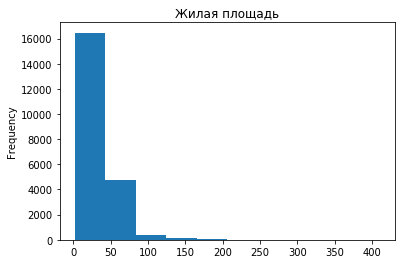

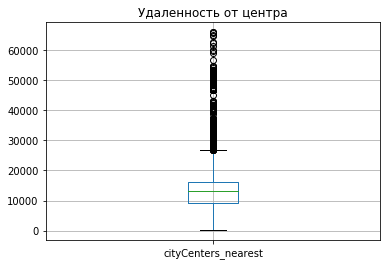

In [3]:
#смотрим кол-во полных дубликатов
data.duplicated().value_counts()
#удаляем неявные дубликаты
data.drop_duplicates(['locality_name', 'rooms', 'floor', 'total_area', 'living_area', 'kitchen_area']).shape


#удаляем столбец is_apartment т.к в нем больше 80% пропусков
#data['is_apartment'].value_counts()
#data.drop('is_apartment',axis=1, inplace=True)


#заполняем нулевые значения высоты потолков медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#строим гистограмму жилой площади и проверяем корреляцию с площадью квартиры
data['living_area'].plot(kind='hist',title='Жилая площадь')
plt.show()
data['total_area'].corr(data['living_area'])

#в столбце total_living считаем соотношение жилой площади к общей площади и высчитываем медиану
data['total_living'] = data['living_area'] / data['total_area']
data['total_living'].median()
#заполняем пустые значения медианным по соотношению двух площадей
data['living_area']=data['living_area'].fillna(data['total_area'] * data['total_living'].median())
#проверяем сильно ли изменились данные
data['living_area'].hist()
plt.show()

#в столбце total_kitchen считаем соотношение площади кухни к общей площади и высчитываем медиану
data['total_kitchen'] = data['kitchen_area'] / data['total_area']
data['total_kitchen'].median()
#заполняем пустые значения медианным по соотношению двух площадей
data['total_kitchen']=data['total_kitchen'].fillna(data['total_area'] * data['total_kitchen'].median())

#изменяем тип данных на дату в столбце first_day_exposition
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')


#заполняем пропущенные значения в - удаленности от центра
data.boxplot(column='cityCenters_nearest').set_title('Удаленность от центра')

plt.show()
data['cityCenters_nearest'].describe()

#заполняем пустые значения медианой
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))

                                                                 


In [4]:
data['total_area']=data['total_area'].astype('int')


#смотрю значения kitchen_area в срезе, где комнат = 0
data.query('rooms == 0')

#заменяю пропущенные значение в площади кухни, где 0 комнат на = 0.                                                                                       
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].where(data['rooms'] == '0', '0'))

#проверяю остались ли пропущенные значения в kitchen_area
#data.info()

#в data_group группирую по комнатам и площади
data_group = data.groupby(['rooms', 'total_area'])

#заменяю пропущенные значения в living_area по медиане, сгрупировав по комнатам + общей площади
data['living_area'] = data['living_area'].fillna(data_group['living_area'].transform(lambda x: x.median()))

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


1. Удалены неявные дубликаты, строки, где значение столбцов - 'locality_name', 'rooms', 'floor', 'total_area', 'living_area', 'kitchen_area' равно.
2.Удален столбец is_apartment, т.к в нем больше 80% пропусков, и он не влияет на дальнейшую работу.
3.Нулевые значения в столбце ceiling_height заполнены медианой.
4.Проверена корелляция жилой площади и площади квартиры, она близка к 1, далее нашли соотношение жилой площади к общей площади - и вывели медианное соотношение.
5.Заполнили пустые значение в столбце living area медианным, исходя из соотношение жилой площади к общей площади.
6.В столбце total_kitchen заполнили нулевые значения медианным, по соотношению жилой площади к площади кухни.
7.В столбце  first_day_exposition заменен тип данных на дату методом to_datetime().
8.В столбце cityCenters_nearest заполняем пустые значения медианной, группируя по населенному пункту.


## Расчёты и добавление результатов в таблицу

In [5]:
#считаем цену квадратного метра и добавляем в таблицу
data['price_square_meter'] = data['last_price'] / data['total_area']

#считаем день недели, месяц и год публикации объявления , добавляем в таблицу
data['year_exposition'] = data['first_day_exposition'].dt.year
data['month_exposition']=data['first_day_exposition'].dt.month
data['day_exposition']=data['first_day_exposition'].dt.dayofweek

#считаем и добавляем в таблицу этаж квартиры; варианты — первый, последний, другой  
def floor_new(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == floors_total:
        return 'Последний'
    if floor == 1:
            return 'Первый'
    return 'Другой' 

data['floor_new'] = data.apply(floor_new, axis=1)

data.head(15)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,year_exposition,month_exposition,day_exposition,floor_new
0,20,13000000.0,108,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,Другой
1,7,3350000.0,40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81.0,83750.000000,2018,12,1,Первый
2,10,5196000.0,56,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,Другой
3,0,64900000.0,159,2015-07-24,3,2.65,14.0,54.00,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,Другой
4,2,10000000.0,100,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,Другой
5,10,2890000.0,30,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55.0,96333.333333,2018,9,0,Другой
6,6,3700000.0,37,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155.0,100000.000000,2017,11,3,Другой
7,5,7915000.0,71,2019-04-18,2,2.65,24.0,36.40,22,NaN,...,0.0,NaN,0.0,NaN,NaN,111478.873239,2019,4,3,Другой
8,20,2900000.0,33,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189.0,87878.787879,2018,5,2,Другой
9,18,5400000.0,61,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88524.590164,2017,2,6,Другой


1. Посчитана цена квадратного метра и добавлена в таблицу.
2.Посчитан день недели, месяц и  год публикации объявления - добавлен в таблицу.
3.С помощью функции и метода apply() добавлен новый столбец в таблицу с информацией об этаже - Первый, Последний, Другой.


## Исследовательский анализ данных

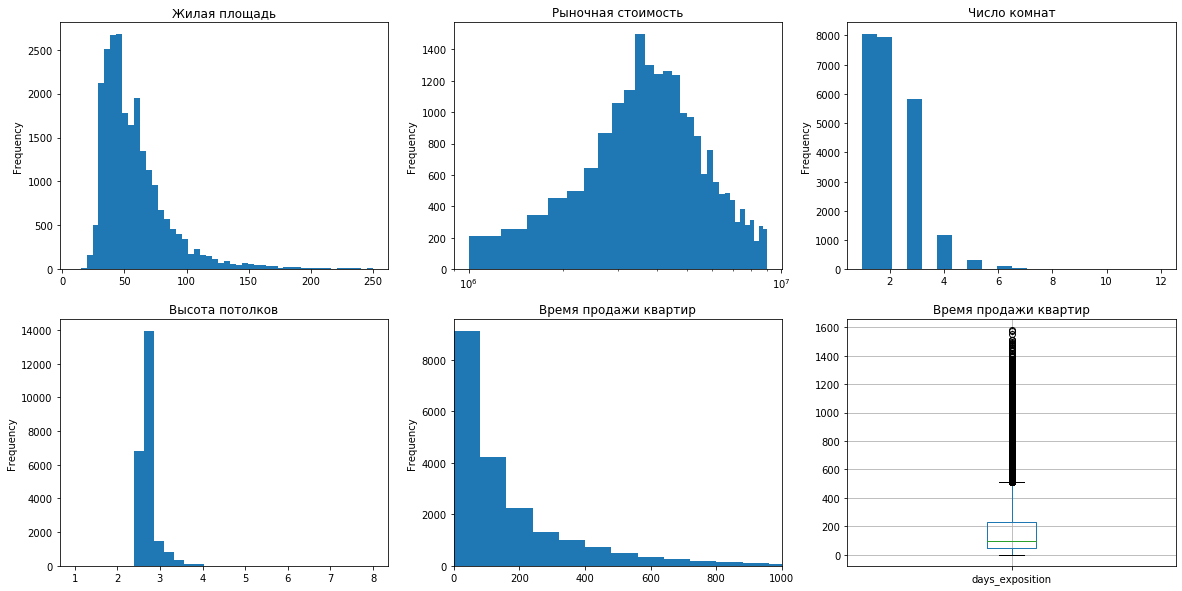

In [6]:
#изучены следующие параметры: площадь, цена, число комнат, высота потолков
#гистограмма площади квартир

fig = plt.figure(figsize = (20,10))
ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4 = fig.add_subplot(2, 3, 4)
ax_5 = fig.add_subplot(2, 3, 5)
ax_6=fig.add_subplot(2, 3, 6)

data['total_area'].plot(ax=ax_1,kind='hist',bins=50, range = (10, 250), title='Жилая площадь')
#data['total_area'].hist(bins=50, range = (10, 250))
#plt.show()
#гистограмма цены квартир
data['last_price'].plot(ax=ax_2,kind='hist',logx=True,bins=30, range = (1000000, 9000000), title='Рыночная стоимость')
#data['last_price'].hist(bins=30,range = (1000000, 9000000))
#plt.show()
#гистограмма числа комнат
#data['rooms'].hist(bins=20,range = (1,12))
data['rooms'].plot(ax=ax_3,kind='hist',bins=20,range = (1,12), title='Число комнат')
#plt.show()
#гистограмма высоты потолков
#data['ceiling_height'].hist(bins=30,range=(1,8))
data['ceiling_height'].plot(ax=ax_4,kind='hist',bins=30,range=(1,8), title='Высота потолков')
#plt.show()


#изучение времени продажи квартир, строим гистограмму и диаграмму размаха
#строим диаграмму размаха
data.boxplot(ax=ax_6,column='days_exposition').set_title('Время продажи квартир')
#plt.show()
#data['days_exposition'].hist(bins=20, range=(1, 1600))
data['days_exposition'].plot(ax=ax_5,kind='hist',bins=20, range=(1, 1600), xlim =(0,1000), title='Время продажи квартир')
#plt.show()

#находим медиану, среднее
data['days_exposition'].describe()

#отбрасываем нетипично долгое время продажи
data = data.query('days_exposition < 1000')



#убираю редкие и выбивающие значения - высота потолка 
data['ceiling_height'].describe()
data = data.query(' 2.5 < ceiling_height < 4')

#убираю редкие и выбивающие значения - площадь квартиры
data['total_area'].describe()
data = data.query(' 15 < total_area < 400')



1.Изучены следующие параметры: площадь, цена, число комнат, высота потолков, построена гистограмма каждого значеня.
2.Изучено временя продажи квартир, построена и диаграмму размаха. Продажа квартир в среднем занимает около 95 дней, нормальное время для продажи квартиры от 45 до 180 дней, при этом самое большое число продаж на 45ый день. Самыми быстрыми продажами можно считать те, что случились от 1ого дня до 45ти - значения до первого квартиля.Верхний «ус» на диаграмме размаха отсекает редкие значения. Необычно долгое время для продаж - большее 500 дней. 
3.Убраны редкие и выбивающиеся значения: высота потолка, площадь квартиры.

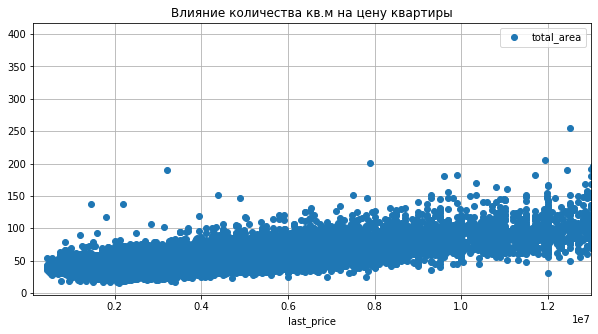

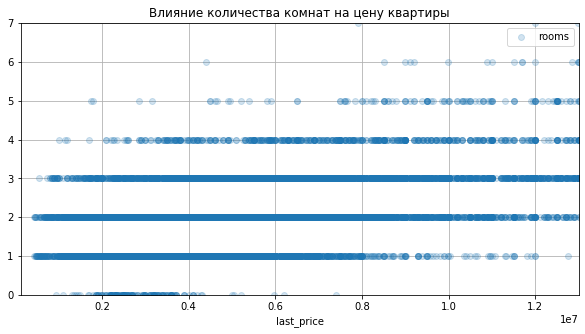

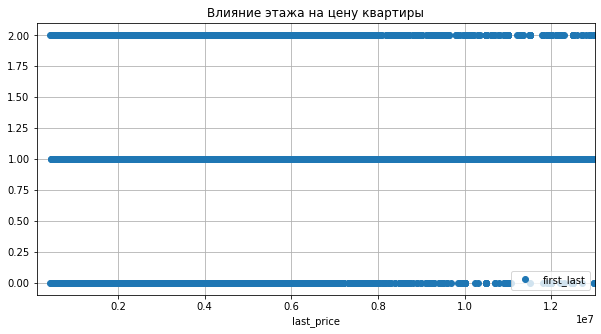

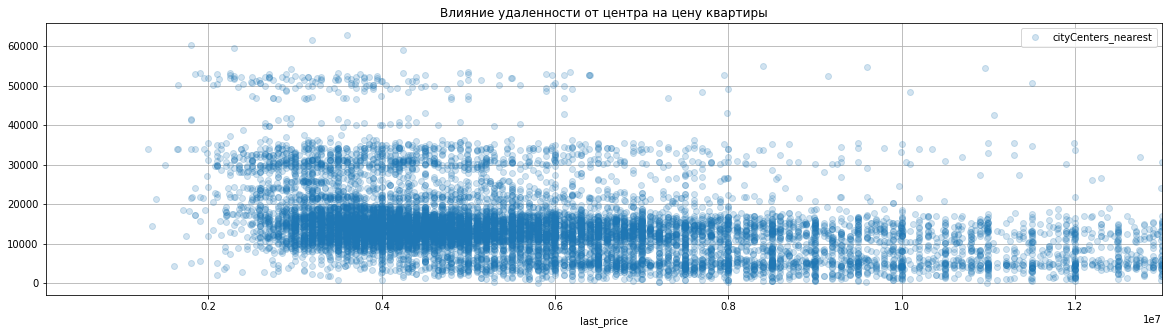

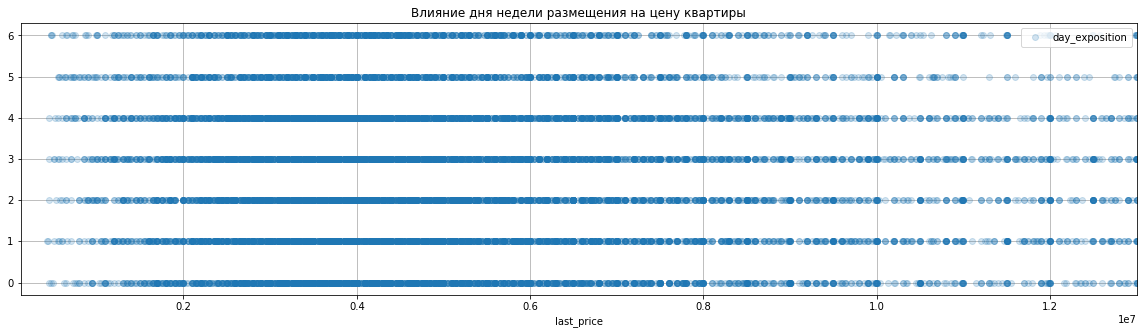

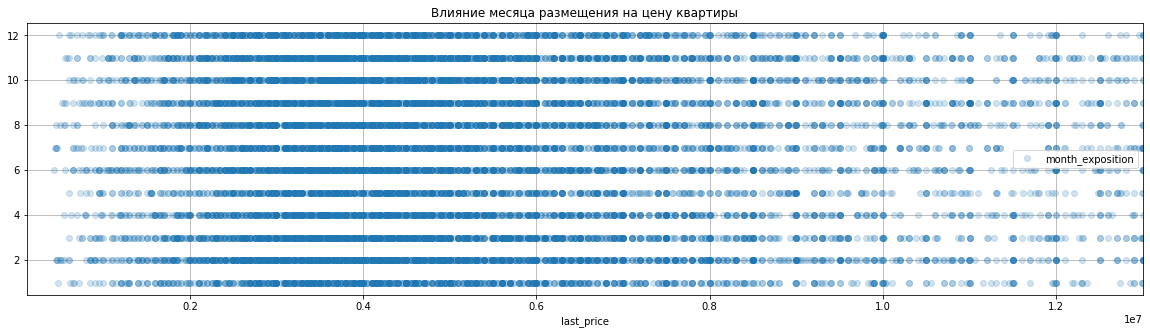

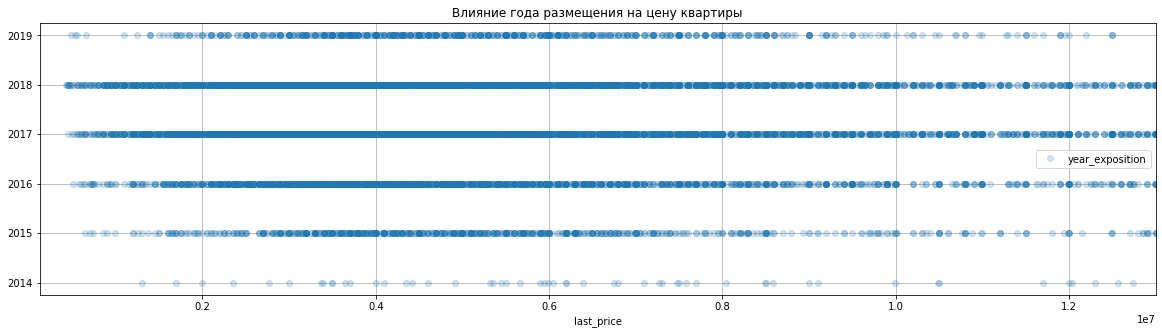

In [7]:
#зависимость цены от квадратных метров
data.sort_values('total_area').plot(x='last_price', style='o', y='total_area',xlim=(120000, 13000000),grid=True,figsize=(10, 5),title='Влияние количества кв.м на цену квартиры')
plt.show()

#зависимость цены от числа комнат
data.sort_values('rooms').plot(x='last_price', y='rooms',style='o',ylim=(0,7), xlim=(120000, 13000000),grid=True,figsize=(10, 5),alpha=0.2,title='Влияние количества комнат на цену квартиры')

#зависимость цены от этажа (первого или последнего)
def first_last(row):
    floor = row['floor_new']

    if floor == 'Последний':
        return 2
    if floor == 'Первый':
            return 0
    else:
        return 1

data['first_last'] = data.apply(first_last, axis=1)


data.plot(x='last_price', y='first_last',style='o', xlim=(120000, 13000000),grid=True, figsize=(10, 5), title='Влияние этажа на цену квартиры')



#зависимость цены от удалённости от центра
data.sort_values('cityCenters_nearest').plot(x='last_price', y='cityCenters_nearest',style='o', xlim=(120000, 13000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние удаленности от центра на цену квартиры')


#Также изучите зависимость от даты размещения: дня недели, месяца и года.
data.sort_values('day_exposition').plot(x='last_price', y='day_exposition',style='o', xlim=(120000, 13000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние дня недели размещения на цену квартиры')

data.sort_values('month_exposition').plot(x='last_price', y='month_exposition',style='o', xlim=(120000, 13000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние месяца размещения на цену квартиры')

data.sort_values('year_exposition').plot(x='last_price', y='year_exposition',style='o', xlim=(120000, 13000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние года размещения на цену квартиры')


1. С помощью метода plot() изучена зависимость цены от разных факторов, сделаны выводы:
а)количество квадратных метров прямо влияет на цену квартиры, чем больше квадратных метров - тем выше цена.
б)квартиры с самым большим кол-вом комнат(больше 5) имеют самые большие цены, при этом по большим ценам можно найти и двух-трехкомнатные квартиры.
в)этаж не влияет на цену квартиры, квартиры по любой цене есть как на первых этажах, так и на последних - в равных кол-вах.
г)удаленность от центра влияет на цену квартиры - чем ближе к центру, тем дороже.

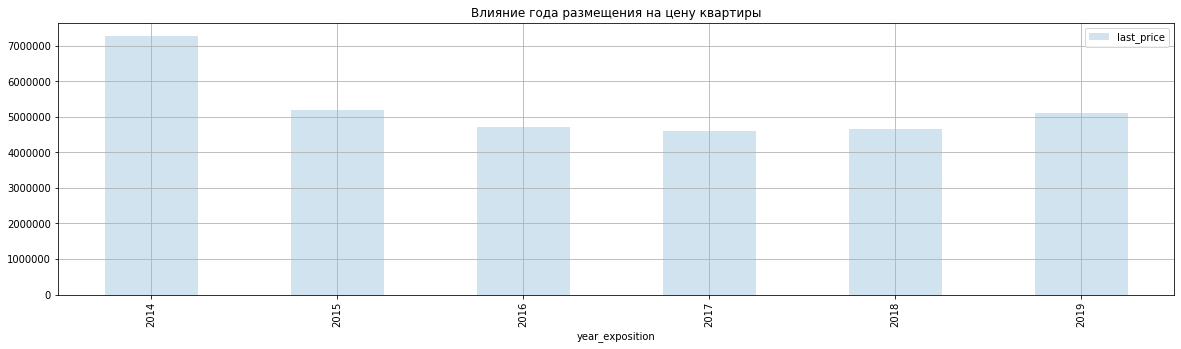

In [16]:
_ = data.groupby('year_exposition').agg({'last_price' : 'median'}).reset_index().plot(x='year_exposition', y='last_price', xlim=(120000, 13000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние года размещения на цену квартиры', kind='bar')

In [9]:
#10 населенных пунктов с наибольшим числом объявлений
data_new=data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

#Считаем среднюю цену квадратного метра в этих населенных пунктах
#Выделяем нас.пункты с самой высокой и низкой стоимостью жилья.
data.query('locality_name in @data_new.index').pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')['price_square_meter'].sort_values(ascending=False)




locality_name
Санкт-Петербург      113940.192178
Пушкин               104296.067083
деревня Кудрово       92926.723006
посёлок Парголово     89934.017522
посёлок Мурино        86468.931405
посёлок Шушары        78278.238060
Колпино               75118.800658
Всеволожск            69153.714508
Гатчина               68299.548770
Выборг                57704.846722
Name: price_square_meter, dtype: float64

1.Выведено 10 населенных пунктов с наибольшим числом объявлений, подсчитана цена квадратного метра в этих пунктах.
2. Самая высокая стоимость жилья - в Санкт-петербурге, самая низкая - в Выборге.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


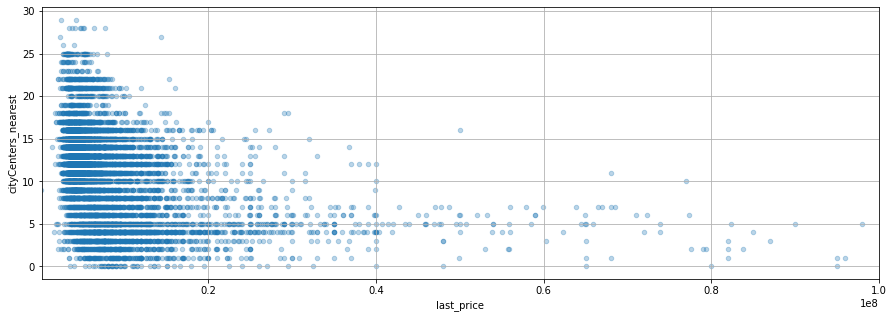

In [10]:
#срез данных по Санкт-Петербургу
data_spb=data.query('locality_name in "Санкт-Петербург" ')

#столбец с расстоянем до центра округляем до целых значений и переводим в километры
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'] / 1000
data_spb['cityCenters_nearest']= data_spb['cityCenters_nearest'].astype('int')

#считаем среднюю цену для каждого километра
data_spb.groupby('cityCenters_nearest')['last_price'].mean()

#Строим график - зависимость цены от удалённости от центра
data_spb.plot(x='last_price', y='cityCenters_nearest',kind='scatter',alpha=0.3, xlim=(120000, 100000000),grid=True, figsize=(15, 5))



1.Создан срез данных по г. - Санкт-петербург.
2.Округлили данные - расстояние до центра и перевели в км.
3.Посчитали среднюю цену для каждого метра и построили график - зависимость цены от удаленности центра.
4. На расстоянии меньше, чем 7 км график сильно отличается - в цене преобладают высокие значения.

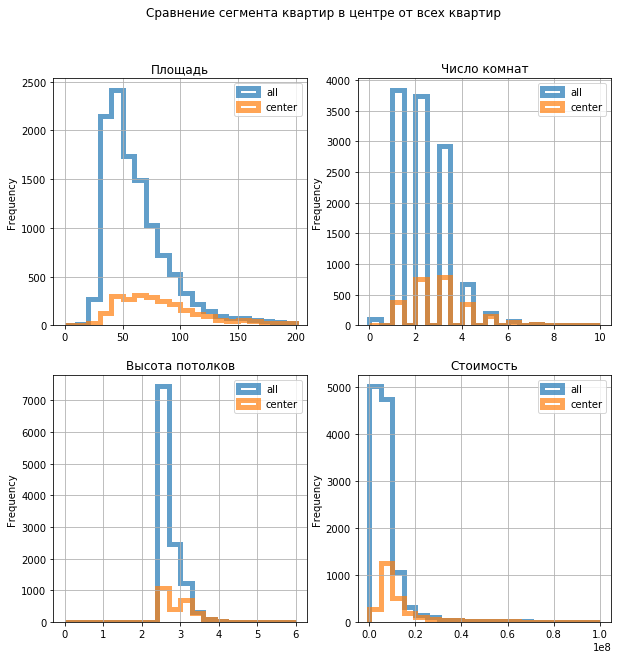

In [11]:
#Выделите сегмент квартир в центре.
data_spb_center = data_spb.query('cityCenters_nearest < 7 ')

fig2 = plt.figure(figsize = (10,10))
fig2.suptitle('Сравнение сегмента квартир в центре от всех квартир')
fig_1 = fig2.add_subplot(2, 2, 1)
fig_2 = fig2.add_subplot(2, 2, 2)
fig_3 = fig2.add_subplot(2, 2, 3)
fig_4 = fig2.add_subplot(2, 2, 4)
#сравнение площади в сегменте центра от всех квартир
data_spb.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    range = (0,200),
    ax=fig_1,
    label='all',
    title='Площадь'
)
data_spb_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    range = (0,200),
    label='center',
    ax=fig_1,
    grid=True,
    legend=True,
) 

#plt.show()
    
#сравнение числа комнат в сегменте центра от всех квартир
data_spb.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    bins=20,
    linewidth=5,
    range = (0,10),
    alpha=0.7,
    ax=fig_2,
    label='all',
    title='Число комнат'
)
data_spb_center.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='center',
    range = (0,10),
    ax=fig_2,
    grid=True,
    legend=True,
) 
#plt.show()
#сравнение высоты потолков в сегменте центра от всех квартир
data_spb.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    bins=20,
    linewidth=5,
    range = (0,6),
    alpha=0.7,
    ax=fig_3,
    label='all',
    title='Высота потолков'
)
data_spb_center.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='center',
    range = (0,6),
    ax=fig_3,
    grid=True,
    legend=True,
) 

#plt.show()

#сравнение цены в сегменте центра от всех квартир
data_spb.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    bins=20,
    linewidth=5,
    range=(120000, 100000000),
    alpha=0.7,
    label='all',
    ax=fig_4,
    title='Стоимость'
)
data_spb_center.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='center',
    ax=fig_4,
    range=(120000, 100000000),
    grid=True,
    legend=True,
) 


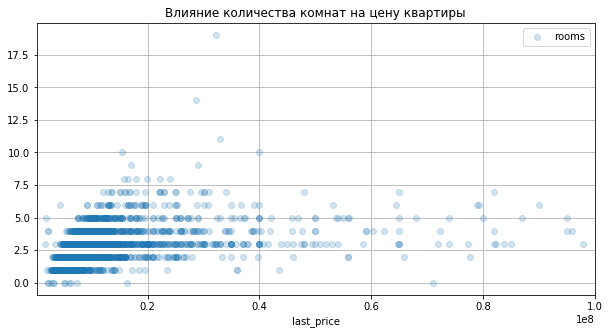

0.33473894259724674


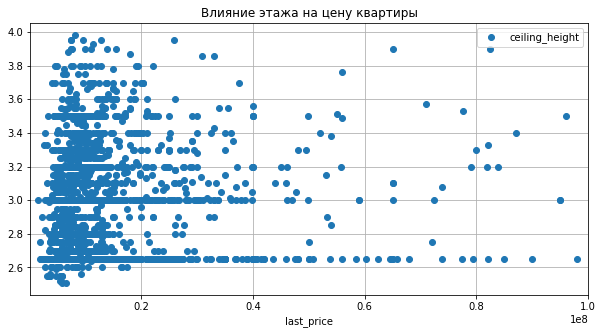

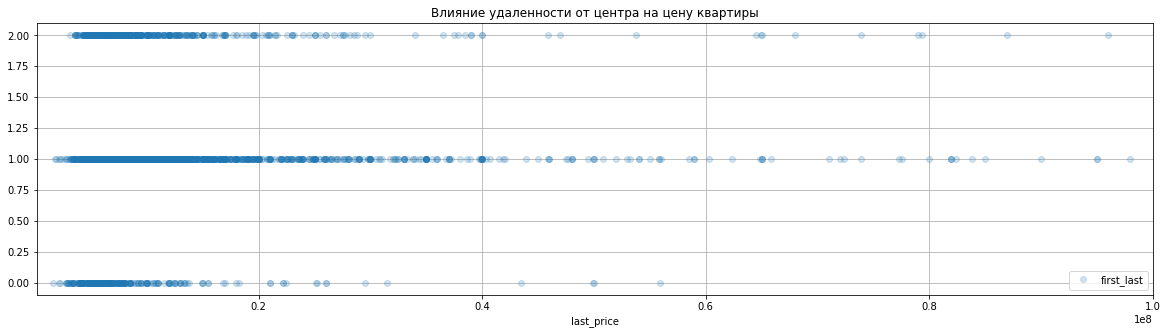

-0.18058706758802875


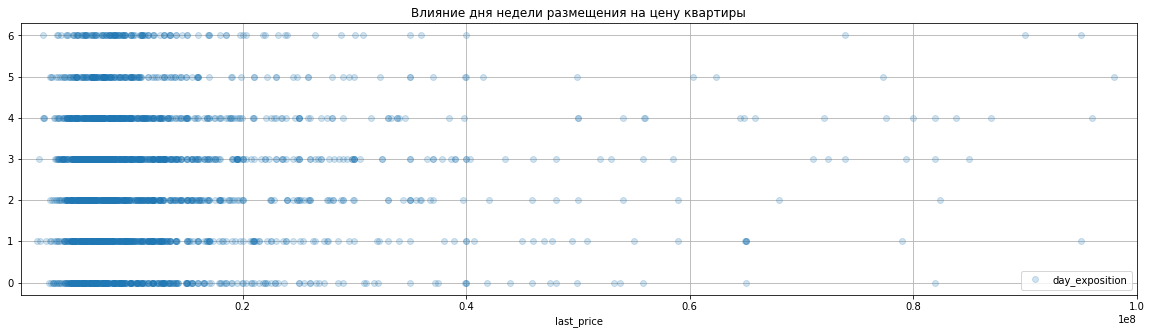

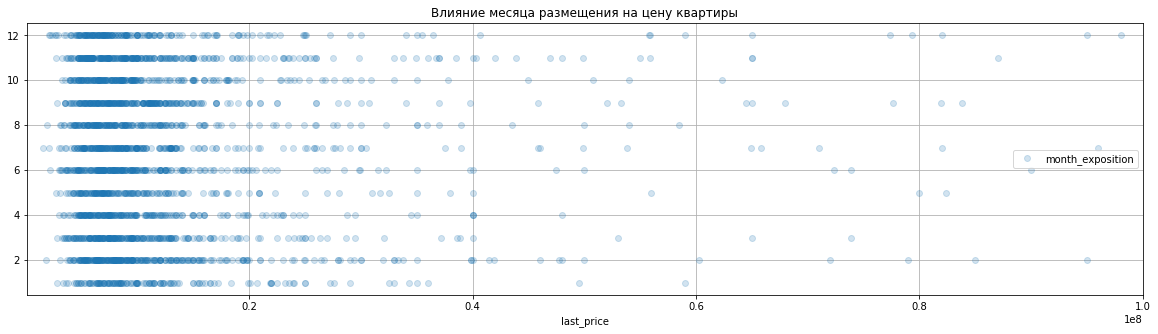

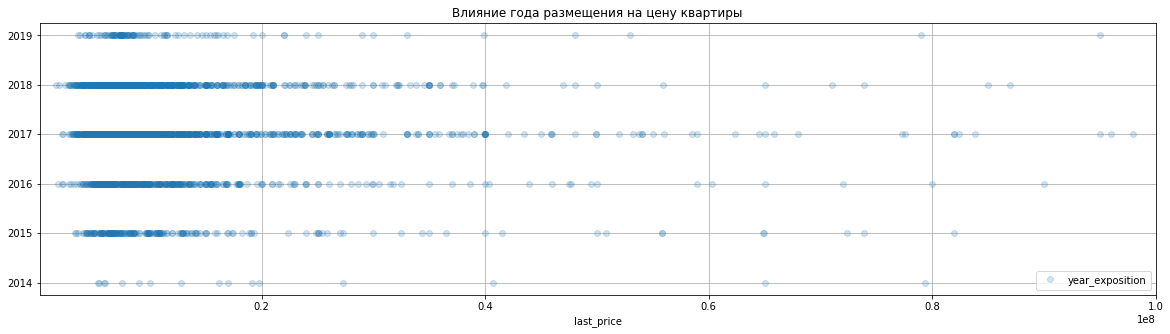

In [12]:
#зависимость цены квартир в центре от числа комнат
data_spb_center.sort_values('rooms').plot(x='last_price', y='rooms',style='o', xlim=(120000, 100000000),grid=True,figsize=(10, 5),alpha=0.2,title='Влияние количества комнат на цену квартиры')
plt.show()
print(data_spb_center['rooms'].corr(data_spb_center['last_price']))
#зависимость цены от этажа (первого или последнего)

data_spb_center.plot(x='last_price', y='ceiling_height',style='o', xlim=(120000, 100000000),grid=True, figsize=(10, 5), title='Влияние этажа на цену квартиры')
#зависимость цены от удалённости от центра
data_spb_center.sort_values('cityCenters_nearest').plot(x='last_price', y='first_last',style='o', xlim=(120000, 100000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние удаленности от центра на цену квартиры')
plt.show()
print(data_spb_center['rooms'].corr(data_spb_center['cityCenters_nearest']))
#Изучена зависимость от даты размещения: дня недели, месяца и года.
data_spb_center.sort_values('day_exposition').plot(x='last_price', y='day_exposition',style='o', xlim=(120000, 100000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние дня недели размещения на цену квартиры')

data_spb_center.sort_values('month_exposition').plot(x='last_price', y='month_exposition',style='o', xlim=(120000, 100000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние месяца размещения на цену квартиры')

data_spb_center.sort_values('year_exposition').plot(x='last_price', y='year_exposition',style='o', xlim=(120000, 100000000),grid=True, figsize=(20, 5),alpha=0.2, title='Влияние года размещения на цену квартиры')




## Общий вывод

Проанализированы данные архива о продаже квартир в городе Санкт-Петербург и области. Рыночная стоимость квартиры прямо зависит от количества квадратных метров, чем больше площадь - тем дороже квартира. Количество комнат не прямо влияют на цену квартиры, квартиры с высокой и с низкой рыночной стоимостью есть и 1комнатные и 5комнатные - тут дело в общей площади.
По результатам всего среза данных - первый и последний этаж имею одинаковый разброс в цене квартир, при этом квартиры в центре Санкт-Петербурга на последнем этаже дороже, чем на первом, думаю, все дело в красивом виде из окна. Также стоимость квартир зависит от местоположения, чем ближе к центру - тем дороже.